In [16]:
from fastai.vision import *
from fastai.metrics import error_rate

from data_prep import get_data_fastai
from dog_breeds import test_model
from dog_breeds_fastai import test_model_fastai

%reload_ext autoreload
%autoreload 2
%matplotlib inline

### get data

In [3]:
data = get_data_fastai()

In [4]:
data.classes[:5], len(data.classes), data.c

(['001.Affenpinscher',
  '002.Afghan_hound',
  '003.Airedale_terrier',
  '004.Akita',
  '005.Alaskan_malamute'],
 133,
 133)

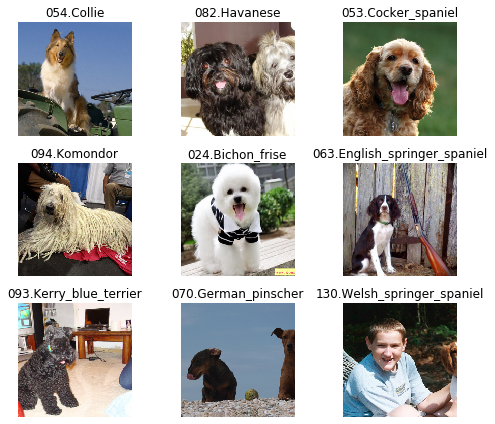

In [5]:
data.show_batch(rows=3, figsize=(7,6))

### find `lr`

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [9]:
learn.load('stage-1');

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


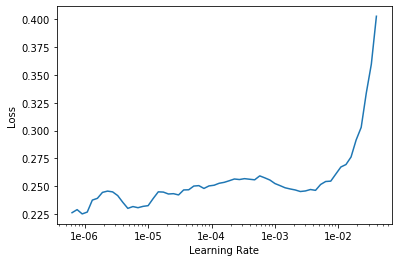

In [11]:
learn.recorder.plot()

In [12]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.251518,0.302430,0.907784,03:24
1,0.235711,0.301111,0.911377,03:12


In [17]:
test_model(model=learn.model,
           batch_size=64)

Test Loss: 0.345957


Test Accuracy: 89% (747/836)


So we get additional `1%` of `accuracy` on test set and `4` additional correct pictures.